In [1]:
import numpy as np
import pandas as pd

import os
all_directories = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        all_directories.append(os.path.join(dirname, filename))

In [2]:
GROUND_TRUTH_PATH = '/kaggle/input/isic-2019/ISIC_2019_Training_GroundTruth.csv'
IMAGE_DIR = '/kaggle/input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/'
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224


ground_truth = pd.read_csv(GROUND_TRUTH_PATH)
ground_truth.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
image    25331 non-null object
MEL      25331 non-null float64
NV       25331 non-null float64
BCC      25331 non-null float64
AK       25331 non-null float64
BKL      25331 non-null float64
DF       25331 non-null float64
VASC     25331 non-null float64
SCC      25331 non-null float64
UNK      25331 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [4]:
ground_truth.describe()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
count,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.000000,25331.0
mean,0.178516,0.508270,0.131183,0.034227,0.103588,0.009435,0.009988,0.024792,0.0
std,0.382954,0.499941,0.337607,0.181815,0.304732,0.096677,0.099440,0.155493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [5]:
for ind in range(len(ground_truth)):
    ground_truth.image[ind] += '.jpg'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
val_inds = (np.random.rand(len(ground_truth)//5) * len(ground_truth)).astype(int)
val_inds

array([22246, 24300,  3079, ..., 19135, 15388,  7946])

In [7]:
train_gt = ground_truth.drop(val_inds, axis=0)
valid_gt = ground_truth.iloc[val_inds]

print(f"train shape: {train_gt.shape}")
print(f"valid shape: {valid_gt.shape}")

train shape: (20759, 10)
valid shape: (5066, 10)


In [8]:
train_gt.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
valid_gt.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
22246,ISIC_0068377.jpg,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24300,ISIC_0071641.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3079,ISIC_0024482.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,ISIC_0013618_downsampled.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14765,ISIC_0056461.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ground_truth.columns

Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

Using TensorFlow backend.


In [12]:
y_cols = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)

train_gen = image_generator.flow_from_dataframe(
            dataframe=train_gt,
            directory=IMAGE_DIR,
            x_col='image',
            y_col=y_cols,
            class_mode="raw",
            batch_size=32,
            shuffle=True,
            seed=42,
            target_size=(IMAGE_WIDTH,IMAGE_HEIGHT))

valid_gen = image_generator.flow_from_dataframe(
            dataframe=valid_gt,
            directory=IMAGE_DIR,
            x_col='image',
            y_col=y_cols,
            class_mode="raw",
            batch_size=32,
            shuffle=True,
            seed=42,
            target_size=(IMAGE_WIDTH,IMAGE_HEIGHT))

Found 20759 validated image filenames.
Found 5066 validated image filenames.


(32, 224, 224, 3)
(32, 9)


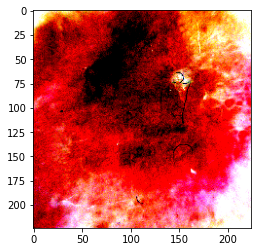

In [13]:
x, y = train_gen.__getitem__(0)
print(x.shape)
print(y.shape)
plt.imshow(x[0]);

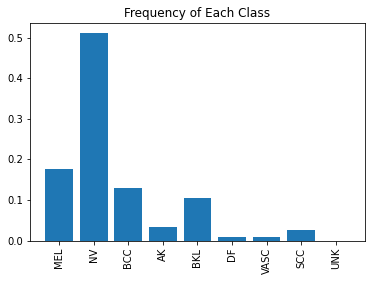

In [14]:
plt.xticks(rotation=90)
plt.bar(x=y_cols, height=np.mean(train_gen.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [15]:
def compute_class_freqs(labels):
    N = labels.shape[0]
    
    positive_frequencies = np.mean(labels, axis=0)
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [16]:
freq_pos, freq_neg = compute_class_freqs(train_gen.labels)
pos_weights = freq_neg
neg_weights = freq_pos
freq_pos

array([0.1774652 , 0.51014018, 0.13040127, 0.0332386 , 0.10496652,
       0.00929717, 0.00963438, 0.02485669, 0.        ])

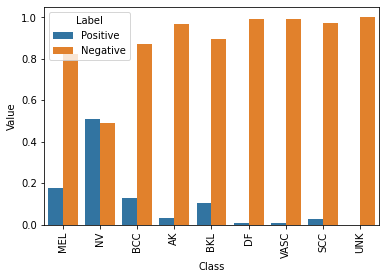

In [17]:
import seaborn as sns
data = pd.DataFrame({"Class": y_cols, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": y_cols[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [18]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss += K.mean(-(pos_weights[i]*y_true[:, i]*K.log(y_pred[:, i]+epsilon)
                             + neg_weights[i]*(1-y_true[:, i])*K.log((1-y_pred[:, i])+epsilon)))
        return loss
    
    return weighted_loss